In [1]:
# Nama  : Avima Haamesha
# NIM   : 10219084

# Tugas Mandiri 2

Konten:
- [Soal 3](#soal_3)

<hr>

### Soal 3 <a name="soal_3"></a>

Masalah: 
- Bola dijatuhkan dari ketinggian tertentu
- Ketika bola memantul, terdapat koefisien restitusi $e = 0.8$
- Terdapat gaya gesek udara

Tujuan:
- Menentukan energi setiap saat

Asumsi:
- Ketinggian awal, $H_o = 5 m$
- Gravitasi, $g = 9.8 m/s^2$
- Kecepatan awal, $v_o = 0$
- Gesekan udara diabaikan
- Acuan nol adalah lantai/tanah
- Arah ke bawah sebagai sumbu y positif
- Massa bola, $m = 1 kg$
- Koefisien gesek udara, $b = 0.1$

Teori:
- GLBB
    $$ \begin{equation} \tag{1} x_i = x_o + v.\Delta t \end{equation} $$
    
    $$ \begin{equation} \tag{2} v_i = v_o + a.\Delta t \end{equation} $$

- Tumbukan inelastik
    $$ \begin{equation} \tag{3} e = \left\lvert \frac{v_f}{v_i} \right\rvert \end{equation} $$

- Gaya gesek udara
    Gaya gesek udara secara sederhana dijabarkan dalam bentuk persamaan linear.
    $$ \begin{equation} \tag{4} F_{ges} = -b \vec{v} \end{equation} $$

    dengan $b$ adalah koefisien gaya gesek.


Analisis:
- Saat bola dijatuhkan dari $H_o$, ketinggian bola berkurang, bola mengalami percepatan karena gravitasi. Ketinggian dan kecepatan benda saat di udara berlaku persamaan GLBB.
- Saat mencapai lantai, $H_i = 0$. Arah kecepatan perlu diubah tandanya. Nilai mutlak kecepatan berkurang karena faktor koefisien restitusi, $e = 0.8$.
- Saat berada di udara, bola akan mengalami perlambatan karena faktor gesekan udara.
- Saat bola berada di puncak lokal ketika di udara, arah kecepatan akan berubah tanda karena faktor gravitasi. Dari persamaan GLBB, arah kecepatan akan otomatis berubah tanda.
- Bola disebut berhenti ketika $H_i = 0$ dan $v_i = 0$.


Implementasi Program:

Waktu hingga bola berhenti: 8.16999999999987 sekon


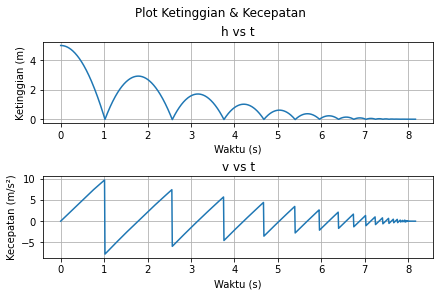

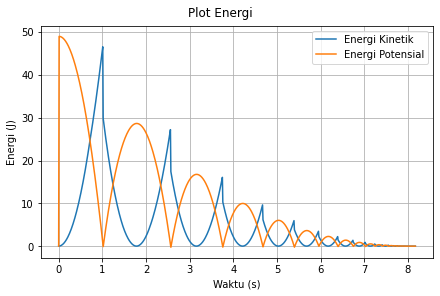

In [3]:
# TUGAS MANDIRI 2 - SOAL 3
# Nama: Avima Haamesha
# NIM: 10219084

import matplotlib.pyplot as plt

arr_h = [5]
arr_v = [0]

arr_ek = [0]
arr_ep = [0]

b = 0.1     # koefisien gesek
m = 1
g = 9.8
e = 0.8     # koef restitusi
koef_a = 0.01   # koef perlambatan saat h = 1/2 ho

dt = 1e-2
arr_t = [0]

epsilon = 1e-3  # nol jika kurang dari epsilon


# ketinggian sesuai glbb
def func_hi(hi_1, vi, dt):
    hi = hi_1 - vi * dt
    return hi

# kecepatan sesuai glbb
def func_vi(vi_1, g, dt):
    vi = vi_1 + g * dt
    return vi

# percepatan dari rumusan gaya gesek
def func_fges(b, v):
    fges = -b * v
    return fges

def func_kinetic_energy(m, v):
    ek = 1/2 * m * v**2
    return ek

def func_potential_energy(m, g, h):
    ep = m * g * h
    return ep


def main():
    while not( (abs(arr_v[-1]) < epsilon) and (arr_h[-1] < epsilon) ):     # belum berhenti
        # ketinggian berkurang
        hi = func_hi(arr_h[-1], arr_v[-1], dt)
        arr_h.append(hi)

        # jika mencapai lantai, ubah arah kecepatan
        if (arr_h[-1] < epsilon):
            vi = -e * arr_v[-1]
        else:   # jika di udara, berlaku GLBB
            # ada faktor perlambatan saat h = 1/2 ho
            if hi < 1/2*arr_h[0]:
                # a = -koef_a * arr_v[-1]   # kasus soal 2
                a = func_fges(b, vi) / m    # kasus soal 3
            else: a = 0
            vi = func_vi(arr_v[-1], (g+a), dt)
        arr_v.append(vi)

        t = arr_t[-1] + dt
        arr_t.append(t)

        # hitung gaya-gaya
        ek = func_kinetic_energy(m, vi)
        arr_ek.append(ek)
        ep = func_potential_energy(m, g, hi)
        arr_ep.append(ep)
        
        # print(vi, hi, t)

    print("Waktu hingga bola berhenti: %s sekon" %t)



if __name__ == "__main__":
    main()


    # plotting data untuk cek validasi hasil
    fig, axs = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
    fig.suptitle("Plot Ketinggian & Kecepatan")
    # plot ketinggian terhadap waktu
    axs[0].set_title("h vs t")
    axs[0].plot(arr_t, arr_h)
    axs[0].set_ylabel("Ketinggian (m)")
    # plot kecepatan terhadap waktu
    axs[1].set_title("v vs t")
    axs[1].plot(arr_t, arr_v)
    axs[1].set_ylabel("Kecepatan (m/s²)")
    for ax in axs:
        ax.set_xlabel("Waktu (s)")
        ax.grid(True)

    # plot energi
    fig_energy, axs_energy = plt.subplots(constrained_layout=True)
    fig_energy.suptitle("Plot Energi")
    axs_energy.plot(arr_t, arr_ek, label="Energi Kinetik")
    axs_energy.plot(arr_t, arr_ep, label="Energi Potensial")
    axs_energy.set_xlabel("Waktu (s)")
    axs_energy.set_ylabel("Energi (J)")
    axs_energy.legend()
    axs_energy.grid(True)
    
    
    plt.show()